In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Uzyskiwanie danych

In [20]:
df_crime = pd.read_csv('crime.csv')
print(df_crime.columns)


Index(['Report Number', 'Report Date', 'Occur Date', 'Occur Time',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Location', 'Shift Occurence', 'Location Type',
       'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 'Latitude',
       'Longitude'],
      dtype='object')


C:\Users\wpyrt\AppData\Local\Temp\ipykernel_13800\1519301158.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crime = pd.read_csv('crime.csv')


In [21]:
time_data = df_crime["Report Date"]

In [22]:
time_data = df_crime["Report Date"]

time_data = pd.to_datetime(time_data)

date_counts = time_data.value_counts().sort_index()

result_df = date_counts.reset_index()
result_df.columns = ['Date', 'Count']

result_df.to_csv('date_counts.csv', index=False)

print("Plik 'date_counts.csv' został zapisany.")

Plik 'date_counts.csv' został zapisany.


# Nasze dane

In [18]:
df_count = pd.read_csv('date_counts.csv')
print(df_count.columns)
count = df_count["Count"]
dates = df_count['Date']

n = len(count)
dates = pd.to_datetime(df_count['Date'])
n = len(count)
date0 = dates.iloc[0]
date_last = dates.iloc[-1]
timedelta = date_last - date0

print(n)
print("First day:", dates[0], "\nLast day:", dates[n-1], "\n Timedelta (this should be lenght of our data):", timedelta)
print("Maximum number of crimes:", max(count), "\nMinimum number of crimes:", min(count))

Index(['Date', 'Count'], dtype='object')
4017
First day: 2009-01-01 00:00:00 
Last day: 2019-12-31 00:00:00 
 Timedelta (this should be lenght of our data): 4016 days 00:00:00
Maximum number of crimes: 170 
Minimum number of crimes: 21


C:\Users\User1\AppData\Local\Temp\ipykernel_4860\2481974396.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xticks = pd.date_range(start=date0, end=date_last, freq='6M')


([<matplotlib.axis.XTick at 0x191d82fde90>,
 [Text(14275.0, 0, '01 - 2009'),
  Text(14456.0, 0, '07 - 2009'),
  Text(14640.0, 0, '01 - 2010'),
  Text(14821.0, 0, '07 - 2010'),
  Text(15005.0, 0, '01 - 2011'),
  Text(15186.0, 0, '07 - 2011'),
  Text(15370.0, 0, '01 - 2012'),
  Text(15552.0, 0, '07 - 2012'),
  Text(15736.0, 0, '01 - 2013'),
  Text(15917.0, 0, '07 - 2013'),
  Text(16101.0, 0, '01 - 2014'),
  Text(16282.0, 0, '07 - 2014'),
  Text(16466.0, 0, '01 - 2015'),
  Text(16647.0, 0, '07 - 2015'),
  Text(16831.0, 0, '01 - 2016'),
  Text(17013.0, 0, '07 - 2016'),
  Text(17197.0, 0, '01 - 2017'),
  Text(17378.0, 0, '07 - 2017'),
  Text(17562.0, 0, '01 - 2018'),
  Text(17743.0, 0, '07 - 2018'),
  Text(17927.0, 0, '01 - 2019'),
  Text(18108.0, 0, '07 - 2019')])

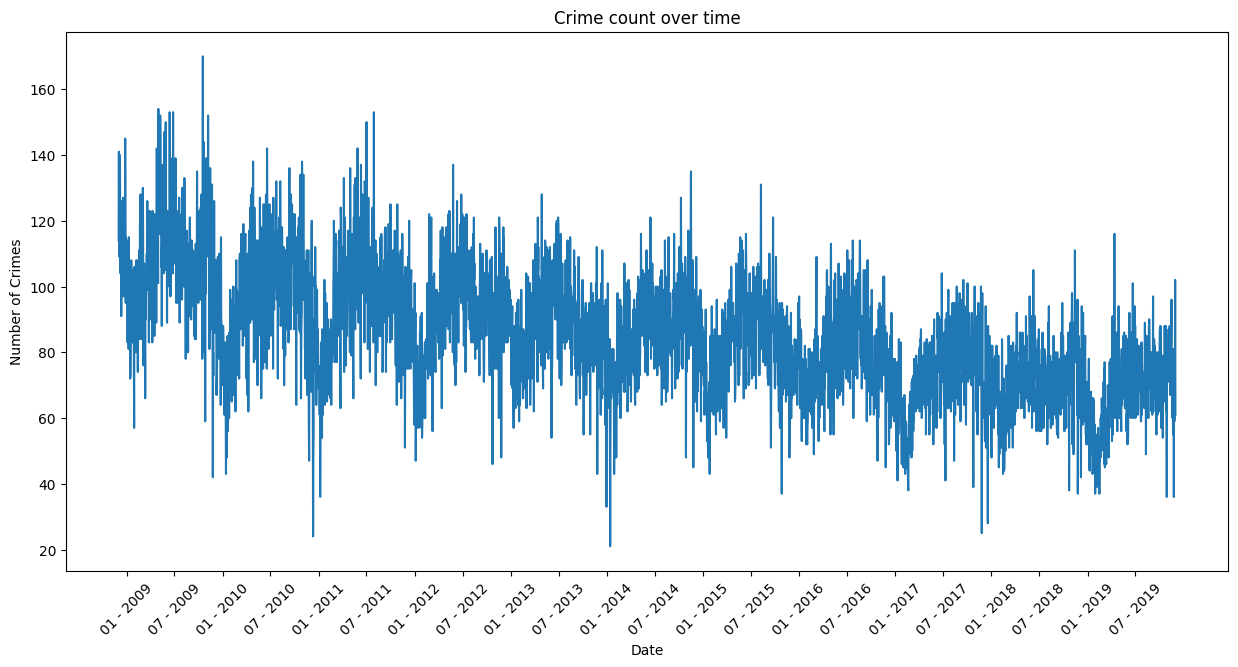

In [24]:

plt.figure(figsize=(15, 7))
plt.plot(dates, count, label="Crime Count")
plt.title("Crime count over time")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")


xticks = pd.date_range(start=date0, end=date_last, freq='6M')
plt.xticks(xticks, labels=[d.strftime('%m - %Y') for d in xticks], rotation=45)

In [27]:
def autocov_emp(X, h):
    n = len(X)
    h = abs(h)
    return 1/n*sum([(X[i] - np.mean(X))*(X[i + h] - np.mean(X)) for i in range(n - h)])

def autocorr_emp(X, h):
    return autocov_emp(X,h)/autocov_emp(X, 0)

H = np.arange(-100, 100, 1)
Cov_emp = np.array([autocov_emp(count, h) for h in H])
Corr_emp = np.array([autocorr_emp(count, h) for h in H])

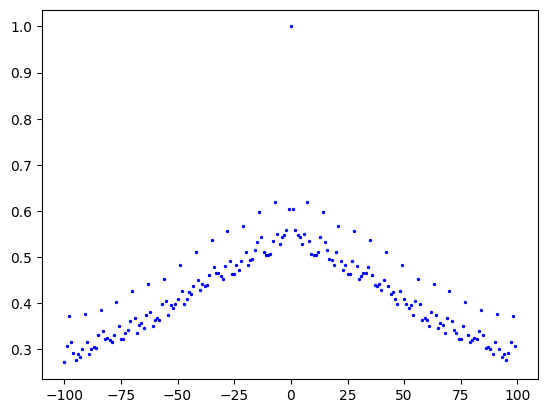

In [28]:
plt.scatter(H, Corr_emp, c = 'b', s = 2)

In [ ]:
plt.figure(figsize = (15, 20))
plt.subplot(4, 2, 1)
plt.scatter(H, Corr_emp, c = 'b', s = 2)
plt.scatter(H, Cov_theor, c = 'r',s = 2)
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.subplot(4, 2, 2)
plt.scatter(T, X, c = 'b', s = 2)
plt.scatter(T, MNK, c = 'r', s = 2)

plt.subplot(4, 2, 3)
plt.stem(H, Corr_X_bez_trendu)
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.subplot(4, 2, 4)
plt.scatter(T, X_bez_trendu, c = 'b', s = 2)

plt.subplot(4, 2, 5)
plt.scatter(T, X_bez_trendu, c = 'b', s = 2)
plt.plot(T, sezonowosc, c = 'r')
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')

plt.subplot(4, 2, 6)
plt.scatter(T, X_bez_sezonu, c = 'b', s = 2)

plt.subplot(4, 2, 7)
plt.scatter(H, Corr_bez_sezonu, c = 'b', s = 2)
plt.scatter(H, Corr_theor, c = 'r', s = 2)